##### Análise de intenção de votos dos presidenciáveis 2018

Segundo o [IBOPE](http://www.ibopeinteligencia.com/noticias-e-pesquisas/lula-lidera-disputa-para-2018-bolsonaro-e-marina-empatam-na-maioria-dos-cenarios/), os principais pré-candidatos de 2018 seriam:
 * Luis Inácio da Silva (Lula)
 * Jair Bolsonaro
 * Geraldo Alckimin
 * João Dória
 * Marina Silva
 * Ciro Gomes

***A partir da análise de dados do facebook, vamos entender os assuntos relacionados a alguns dos principais candidatos, bem como suas reações.***

![Candidatos](https://img.estadao.com.br/resources/jpg/2/4/1502712078742.jpg)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", 'This pattern has match groups')
warnings.filterwarnings("ignore", 'A value is trying to be set on a copy of a slice from a DataFrame')


In [4]:
#Reading Data
face= pd.read_csv('./data/DatasetFacebook.csv', delimiter=';', encoding = "ISO-8859-1")
face.head()

SRC   METHOD           FROM                                 ID  \
0  ad.alvarodias     POST  ad.alvarodias   199599520097304_1810872098970030   
1  ad.alvarodias  COMMENT            NaN  1810872098970030_1810890865634820   
2  ad.alvarodias    REPLY            NaN  1810872098970030_1810945125629394   
3  ad.alvarodias    REPLY            NaN  1810872098970030_1811078895616017   
4  ad.alvarodias    REPLY            NaN  1810872098970030_1811483528908887   

                        RELATIONSHIP                      DATE  \
0                      ad.alvarodias  2018-02-27T21:32:00+0000   
1   199599520097304_1810872098970030  2018-02-27T21:34:52+0000   
2  1810872098970030_1810890865634820  2018-02-27T22:55:02+0000   
3  1810872098970030_1810890865634820  2018-02-28T02:11:51+0000   
4  1810872098970030_1810890865634820  2018-02-28T12:22:59+0000   

                                             MENTION  REACTIONS  LIKE  LOVE  \
0  Você acha que a criação do Ministério da Segur...        798   696     2   
1  Não adianta ministério e este não funcionar co...         71    70     1   
2                           Parabéns pelo comentário          2     2     0   
3                                  Falou tudo ??????          1     1     0   
4  sou do Rio, Senador. Concordo com que o Código...          0     0     0   

   WOW  HAHA  SAD  ANGRY  THANKFUL  PRIDE  TOTAL COMMENT  SHARE       RANDON  
0    1     6   22     71         0      0            583    153  0,107205556  
1    0     0    0      0         0      0              7      0  0,968696314  
2    0     0    0      0         0      0              0      0  0,099476575  
3    0     0    0      0         0      0              0      0  0,277738496  
4    0     0    0      0         0      0              0      0  0,474025374

#### Exploração do DataSet

In [5]:
print('Registros por Método:\n\n',face.groupby('METHOD').count().ID.sort_values(), '\n')
print('Registros por Source:\n\n',face.groupby('SRC').count().ID.sort_values(ascending=False)[0:10], '\n')
print('Reações por post de Fonte:\n\n')
face[face['METHOD'] == 'POST'].groupby('SRC').sum().loc[:,'REACTIONS':'PRIDE' ].sort_values('REACTIONS',ascending=False)[0:10]


Registros por Método:

 METHOD
POST         5741
REPLY       50114
COMMENT    100433
Name: ID, dtype: int64 

Registros por Source:

 SRC
gauchazh             7638
UOL                  7241
g1                   6911
estadao              5423
Veja                 5151
jornaloglobo         5101
Brasil247            4949
jornalextra          4525
diariocatarinense    4234
Exame                4044
Name: ID, dtype: int64 

Reações por post de Fonte:




REACTIONS    LIKE  LOVE    WOW   HAHA  \
SRC                                                                         
g1                                     209651  143790  6685  15587  18846   
UOL                                    147627  119647  2440   8282   8363   
mblivre                                144808  114112  3051    949  13002   
jairmessias.bolsonaro                   75248   68360  4406    349    132   
Veja                                    74769   58528  3580   1817   5482   
Exame                                   73251   60583  4273   4556   1982   
gauchazh                                70841   54919  3468   2524   7802   
jornalextra                             67584   47272  5546   2487   7318   
jairbolsonaropresidente2018Oficial      54815   49272  2499    249   1662   
estadao                                 49680   35052  3974   1425   5525   

                                      SAD  ANGRY  THANKFUL  PRIDE  
SRC                                                                
g1                                  14918   9825         0      0  
UOL                                  5972   2923         0      0  
mblivre                               548  13146         0      0  
jairmessias.bolsonaro                 104   1897         0      0  
Veja                                 1886   3476         0      0  
Exame                                 482   1375         0      0  
gauchazh                              752   1376         0      0  
jornalextra                          1454   3507         0      0  
jairbolsonaropresidente2018Oficial    224    909         0      0  
estadao                              1274   2430         0      0


Duas páginas páginas relacionadas ao pré-candidato ***Jair Bolsonaro*** estão entre as 10 páginas com maior número de reações.

No entanto, existem outras páginas no dataset que podem apresentar conteúdos que não estão necessariamente relacionados aos pré-candidatos. Essas interações possivelmente não conterão informações muito relevantes acerca dos candidatos, ao menos para essa análise simples.

In [8]:
g1_interacoes = face.loc[(face.SRC == 'g1') & (face.METHOD == 'POST'), 'MENTION']
interacoes = [np.random.randint(0,len(g1_interacoes.index)) for x in range(0,20) ]
for interacao in interacoes:
    print ('Publicação '+ str(g1_interacoes.index[interacao]) + ':', g1_interacoes[g1_interacoes.index[interacao]], '\n')


Publicação 116500: Considerado o maior traficante de fuzis para o Brasil, Frederik Barbieri foi preso nos EUA no sábado (24) https://glo.bo/2GJsJ68 #G1 

Publicação 116599: Funcionários ficaram desconfiados quando comida passou pelo raio X https://glo.bo/2oyyagI #G1 

Publicação 112207: Qualquer cidadão poderá ver salários e auxílios recebidos ==> https://glo.bo/2CKZP38 #G1 

Publicação 110776: Ana Hikari, que faz a Tina de Malhação, contou episódio que aconteceu no estacionamento de restaurante https://glo.bo/2t0s1PN #G1 

Publicação 116599: Funcionários ficaram desconfiados quando comida passou pelo raio X https://glo.bo/2oyyagI #G1 

Publicação 116916: Sobras são cozidas e vendidas em favelas da capital do país https://glo.bo/2EUVyjr #G1 

Publicação 111318: No início do mês, ele deu a entender que investigação da PF sobre o presidente Temer poderia ser arquivada. Novo chefe já foi escolhido. Leia mais https://glo.bo/2HQu8sE #G1 

Publicação 110077: Saída de Segovia ocorre após ele 

Devemos então procurar por interações que tenham um conteúdo mais claro em relação aos pré-candidatos e eleições ou nas páginas que estejam diretamente ligadas aos candidados (e.g., oCiroGomes). Go to Regex!

In [298]:
termos = '([Mm]arina\s?([Ss]ilva)?)|'                                                   # Marina Silva
termos += '(([Ll]ula)|((Luis\sIn[aá]cio\s)(Lula)?(da\sSilva)?)|([Ee]x-[Pp]residente))|' # Lula
termos += '((Jair\s)?[Bb]olsonaro.*?)|'                                                 # Bolsonaro
termos += '(([Cc]iro)\s?(Gomes))|'                                                      # Ciro Gomes
termos += '((Jo[aã]o)?\s?([Dd][óo]ria))|'                                               # João Dória
termos += '([aA]lvaro\s?[Dd]ias)|'                                                      # Álvaro dias
termos += '(([Gg]eraldo)?\s?(Alcki?min))|'                                              # Geraldo Alckmin
termos += '(([Ee]lei[cç][oõ]es\s?2018)|(#eleicoes2018))'                                # #eleicoes2018
termos = '(' + termos + ')'
precandidatos = re.compile(termos)
interacoes_candidatos = face.SRC.str.contains(precandidatos) | face.MENTION.str.contains(precandidatos)
face_candidatos = pd.DataFrame.copy(face.loc[interacoes_candidatos,])
print ('Total de interações citando alguns dos pré-candidatos e eleições 2018: ', interacoes_candidatos.sum() )

Total de interações citando alguns dos pré-candidatos e eleições 2018:  17159


Quando avaliamos somente as interações citando os candidatos, vemos que o número de registros reduz drasticamente. No entanto, utilizaremos esse novo dataset para entender os assuntos que orbitam ao redor dos pré-candidatos e o "sentimento" contido nessas afirmações.

Novamente vamos ver algumas informações das páginas que citam os candidatos ou páginas diretamente relacionada aos candidatos.

In [14]:
print('Principais páginas e suas respectivas reações citando os candidatos e porcentagem\n\
dos diferentes tipos de reação:')
top10_reacoes=face_candidatos.groupby('SRC').sum().loc[:,'REACTIONS':'PRIDE' ].sort_values('REACTIONS',ascending=False)[0:10]

top10_reacoes['LIKE']     = round( (top10_reacoes['LIKE'] )/ top10_reacoes['REACTIONS'] ,3)
top10_reacoes['LOVE']     = round( (top10_reacoes['LOVE'] )/ top10_reacoes['REACTIONS'] ,3)
top10_reacoes['WOW']      = round( (top10_reacoes['WOW'] )/ top10_reacoes['REACTIONS'] ,3)
top10_reacoes['HAHA']     = round( (top10_reacoes['HAHA'] )/ top10_reacoes['REACTIONS'] ,3)
top10_reacoes['SAD']      = round( (top10_reacoes['SAD'] )/ top10_reacoes['REACTIONS'] ,3)
top10_reacoes['ANGRY']    = round( (top10_reacoes['ANGRY'] )/ top10_reacoes['REACTIONS'] ,3)
top10_reacoes['THANKFUL'] = round( (top10_reacoes['THANKFUL'] )/ top10_reacoes['REACTIONS'] ,3)
top10_reacoes

Principais páginas e suas respectivas reações citando os candidatos e porcentagem
dos diferentes tipos de reação:


REACTIONS   LIKE   LOVE    WOW   HAHA  \
SRC                                                                         
jairmessias.bolsonaro                   81988  0.910  0.057  0.004  0.004   
jairbolsonaropresidente2018Oficial      58705  0.900  0.044  0.004  0.032   
marinasilva.oficial                     32796  0.593  0.149  0.054  0.188   
ad.alvarodias                           28714  0.923  0.037  0.009  0.013   
bolsonaros2                             27078  0.915  0.040  0.002  0.031   
SomostodosJairMessiasBolsonaro          23096  0.727  0.019  0.004  0.246   
TimeCiroGomes                           14494  0.690  0.043  0.009  0.254   
oCiroGomes                              11106  0.855  0.006  0.024  0.045   
jairomessiasbolsonaro                    8295  0.877  0.081  0.009  0.025   
estadao                                  6933  0.676  0.042  0.009  0.197   

                                      SAD  ANGRY  THANKFUL  PRIDE  
SRC                                                                
jairmessias.bolsonaro               0.001  0.023       0.0      0  
jairbolsonaropresidente2018Oficial  0.004  0.016       0.0      0  
marinasilva.oficial                 0.003  0.014       0.0      0  
ad.alvarodias                       0.005  0.014       0.0      0  
bolsonaros2                         0.001  0.011       0.0      0  
SomostodosJairMessiasBolsonaro      0.001  0.004       0.0      0  
TimeCiroGomes                       0.001  0.003       0.0      0  
oCiroGomes                          0.017  0.054       0.0      0  
jairomessiasbolsonaro               0.001  0.007       0.0      0  
estadao                             0.003  0.074       0.0      0

Vamos ver alguns dos comentários dessas menções aos candidatos ou das páginas dos candidatos:

In [17]:
mencoes = [np.random.randint(0,len(face_candidatos.index)) for x in range(0,5) ]
for mencao in mencoes:
    print ('Interação '+ str(face_candidatos.index[mencao]) + ' da página '+ face_candidatos.loc[face_candidatos.index[mencao],'SRC'] + ':',  
           face_candidatos.loc[face_candidatos.index[mencao], 'MENTION'], '\n')

Interação 4166 da página TimeCiroGomes: sentaram na graxa hahaha como que vai dizer que ele falou isso ou aquilo por uma reportagem de revista com o cara na frente? poderia ter feito uma pergunta mais direta e ter dormido sem essa 

Interação 11077 da página jairbolsonaropresidente2018Oficial: vdd.falou tudo.bolsonaro neles e Lula na cadeia 

Interação 6744 da página bolsonaros2: A REDE GLOBO É UMA EMISSORA SATÂNICA, AS PESSOAS FRACAS SÃO COAGIDAS A SEGUIREM , MAIS SABEMOS QUE O BEM VENCE O MAL,..POR ISSO TEMOS  agora UM HM DE  MORAL e CARÁTER PRA BOTAR O BRASIL EM ORDEM,  JAIR BOLSONARO   PRESIDENTE DO BRASIL 

Interação 12019 da página lulatavoltando: Olha isso aí, Moro. Se é que, mesmo estudando Direito, você já ouviu falar no marquês de Beccaria. 

Interação 13049 da página marinasilva.oficial: Valdson Vasconcelos você é desonesto dizendo mentiras. 



Vamos ter uma ideia mais visual das reações das páginas por candidato.

<img src="https://en.facebookbrand.com/wp-content/uploads/2016/09/reactions_12_2017.png" height="100px;" width="400px;"/>

In [292]:
marina    ='([Mm]arina\s?([Ss]ilva)?)'                                                   # Marina Silva
lula      ='(([Ll]ula)|((Luis\sIn[aá]cio\s)(Lula)?(da\sSilva)?)|([Ee]x-[Pp]residente))' # Lula
bolsonaro ='((Jair\s)?[Bb]olsonaro.*?)'                                                 # Bolsonaro
ciro      ='(([Cc]iro)\s?(Gomes))'                                                      # Ciro Gomes
doria     ='((Jo[aã]o)?\s?([Dd][óo]ria))'                                               # João Dória
dias      ='([aA]lvaro\s?[Dd]ias)'                                                      # Álvaro dias
alckmin   ='(([Gg]eraldo)?\s?(Alcki?min))'                                              # Geraldo Alckmin

df_marina    = pd.DataFrame(face_candidatos.loc [face_candidatos.SRC.str.contains(marina) ])
df_marina['Candidato'] = 'marina'
df_lula      =  pd.DataFrame(face_candidatos.loc [face_candidatos.SRC.str.contains(lula) ])
df_lula['Candidato'] = 'lula'
df_bolsonaro =  pd.DataFrame(face_candidatos.loc [face_candidatos.SRC.str.contains(bolsonaro)])
df_bolsonaro['Candidato'] = 'bolsonaro'
df_ciro      =  pd.DataFrame(face_candidatos.loc [face_candidatos.SRC.str.contains(ciro) ])
df_ciro['Candidato'] ='ciro'
df_doria     =  pd.DataFrame(face_candidatos.loc [face_candidatos.SRC.str.contains(doria)])
df_doria['Candidato'] ='doria'
df_dias      =  pd.DataFrame(face_candidatos.loc [face_candidatos.SRC.str.contains(dias)])
df_dias['Candidato']='adias'
df_alckmin   =  pd.DataFrame(face_candidatos.loc [face_candidatos.SRC.str.contains(alckmin)])
df_alckmin['Candidato'] = 'alckmin'
dfs = [df_alckmin, df_ciro,df_bolsonaro,df_dias,df_dias,df_doria,df_lula,df_marina]
dfs = pd.concat(dfs)
dfs = dfs.groupby('Candidato', as_index=False,axis=0).sum()
dfs2 = pd.DataFrame.copy(dfs)
colunas = ['LIKE', 'LOVE', 'WOW' ,'HAHA', 'SAD', 'ANGRY']
for coluna in colunas:
    dfs2[coluna] = round (dfs2[coluna] / dfs2.REACTIONS,3)

dfs2 = dfs2.iloc[:,[0,2,3,4,5,6,7]]
dfs2 = dfs2.melt(id_vars=['Candidato'], var_name='Reações',value_name='Quantidade')
dfs = dfs.iloc[:,[0,2,3,4,5,6,7]]
dfs = dfs.melt(id_vars=['Candidato'], var_name='Reações',value_name='Quantidade')


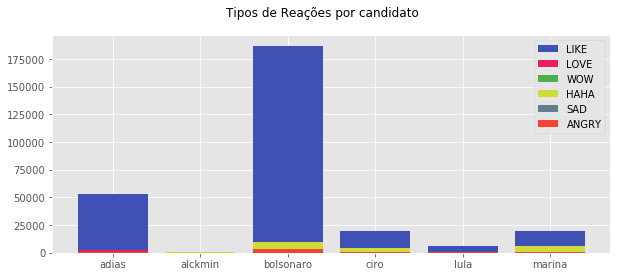

In [293]:
plt.figure(figsize=(10,4))
plt.style.use('ggplot')
p1=plt.bar('Candidato','Quantidade', data=dfs[dfs.Reações == 'LIKE'], color='#3F51B5' )   
p2=plt.bar('Candidato','Quantidade', data=dfs[dfs.Reações == 'LOVE'], color='#E91E63' )   
p3=plt.bar('Candidato','Quantidade', data=dfs[dfs.Reações == 'WOW'], color='#4CAF50'  )   
p4=plt.bar('Candidato','Quantidade', data=dfs[dfs.Reações == 'HAHA'], color='#CDDC39' )   
p5=plt.bar('Candidato','Quantidade', data=dfs[dfs.Reações == 'SAD'], color='#607D8B'  )   
p6=plt.bar('Candidato','Quantidade', data=dfs[dfs.Reações == 'ANGRY'], color='#F44336')   

g = (p1[0],p2[0],p3[0],p4[0],p5[0],p6[0])
plt.legend(g,dfs.Reações.unique() )
plt.suptitle('Tipos de Reações por candidato')
plt.show()

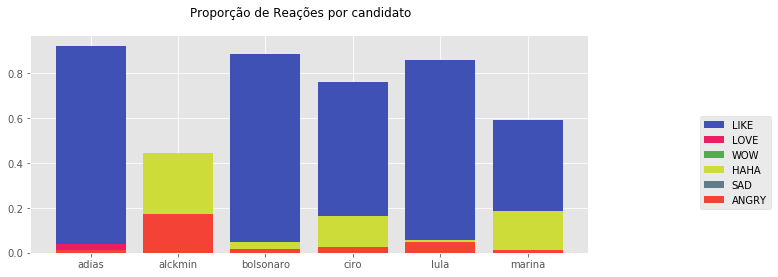

In [294]:
plt.figure(figsize=(10,4))
plt.style.use('ggplot')
p1=plt.bar('Candidato','Quantidade', data=dfs2[dfs2.Reações == 'LIKE'], color='#3F51B5' )   
p2=plt.bar('Candidato','Quantidade', data=dfs2[dfs2.Reações == 'LOVE'], color='#E91E63' )   
p3=plt.bar('Candidato','Quantidade', data=dfs2[dfs2.Reações == 'WOW'], color='#4CAF50'  )   
p4=plt.bar('Candidato','Quantidade', data=dfs2[dfs2.Reações == 'HAHA'], color='#CDDC39' )   
p5=plt.bar('Candidato','Quantidade', data=dfs2[dfs2.Reações == 'SAD'], color='#607D8B'  )   
p6=plt.bar('Candidato','Quantidade', data=dfs2[dfs2.Reações == 'ANGRY'], color='#F44336')   

g = (p1[0],p2[0],p3[0],p4[0],p5[0],p6[0])
plt.legend(g,dfs.Reações.unique(), loc=(1.2,0.2))
plt.suptitle('Proporção de Reações por candidato')
plt.show()

### Significado das reações

Embora os gráficos acima apresentem a distribuição de reações consideradas positivas (e.g., likes) e negativas (e.g., angry), não podemos saber nada a respeito do conteúdo do post, comentário ou resposta. Ou seja, ter um like não significa algo positivo para o candidato necessariamente. Para isso teremos que avaliar o conteúdo das menções de cada candidato.

**Vamos ver quais palavras são mais usadas nas interações em que o nome dos candidatos aparecem**

Para isso precisaremos:


* Limpar o corpus removendo stopwords
* Transformar tudo para lowercase e removendo acentuações (acentos podem ser importantes por expressar emoções como ":)", mas para simplificar a análise, removeremos esses caracteres)


In [409]:
from nltk.corpus import stopwords
stop = stopwords.words('portuguese')
stop.append('q')
stop.append('é')
stop.append('pra')
stop.append('pro')
stop.append('tá')
stop.append('dá')

stop.append('vc')
stop.append('nao')
stop.append('pq')

def processaPalavras(palavras):
        palavras_clean = palavras.lower().replace('[!,.:;?@\(\)0-9]', '')
        processada=[palavra for palavra in palavras_clean .split() if not palavra in stop]
        return " ".join(processada)
face_candidatos['MENCOES_PROCESSADAS'] = face_candidatos.MENCOES_PROCESSADAS.apply(processaPalavras)


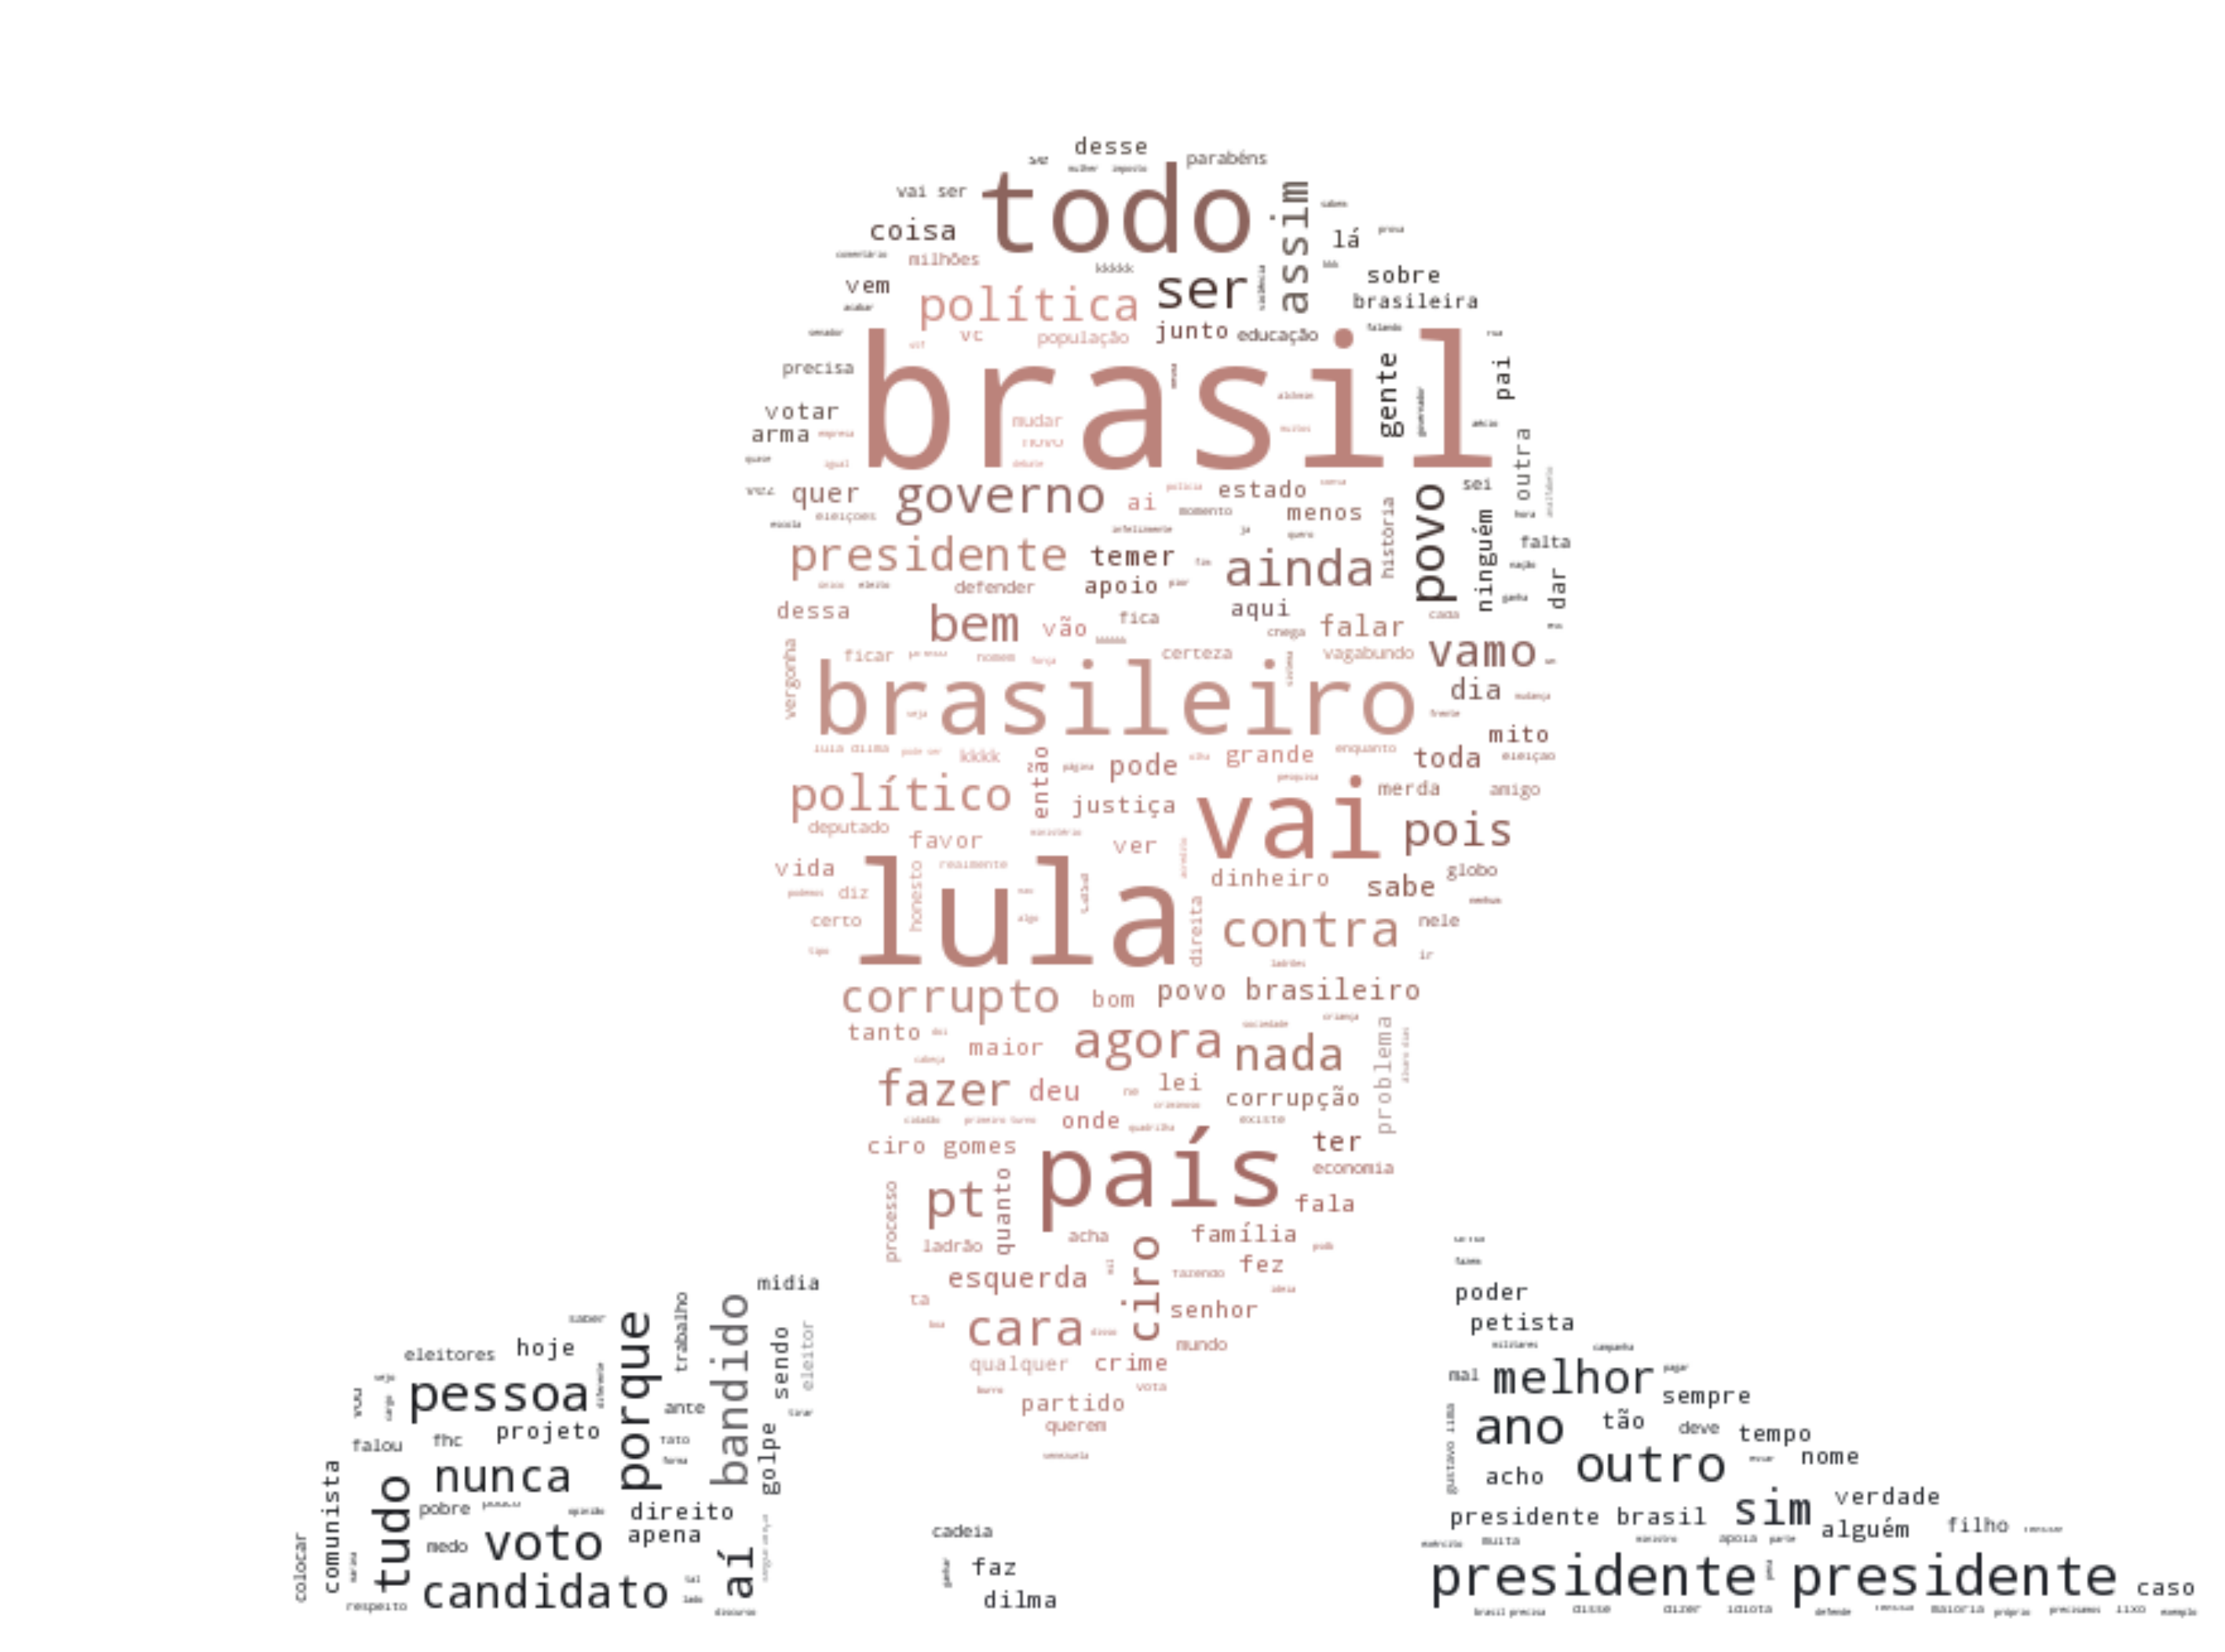

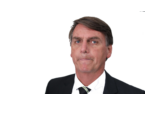

In [447]:
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
img = np.array(Image.open('./bolso2.png'))
palavras = set(face_candidatos.MENCOES_PROCESSADAS[face_candidatos.MENCOES_PROCESSADAS.str.contains('bolsonaro|brasil')].str.replace('(bolsonaro|jair|messias)', ''))

wc = WordCloud(background_color="white",width = 1000, height = 1000, 
                            max_words=500, mask=img, 
                            margin=10,random_state=1)
wc.generate(' '.join(palavras))
image_colors = ImageColorGenerator(img)
plt.figure(figsize=(50,50))
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.show()
plt.figure(figsize=(2,2))
plt.imshow(img, cmap=plt.cm.gray, interpolation="bilinear")
plt.axis("off")
plt.show()

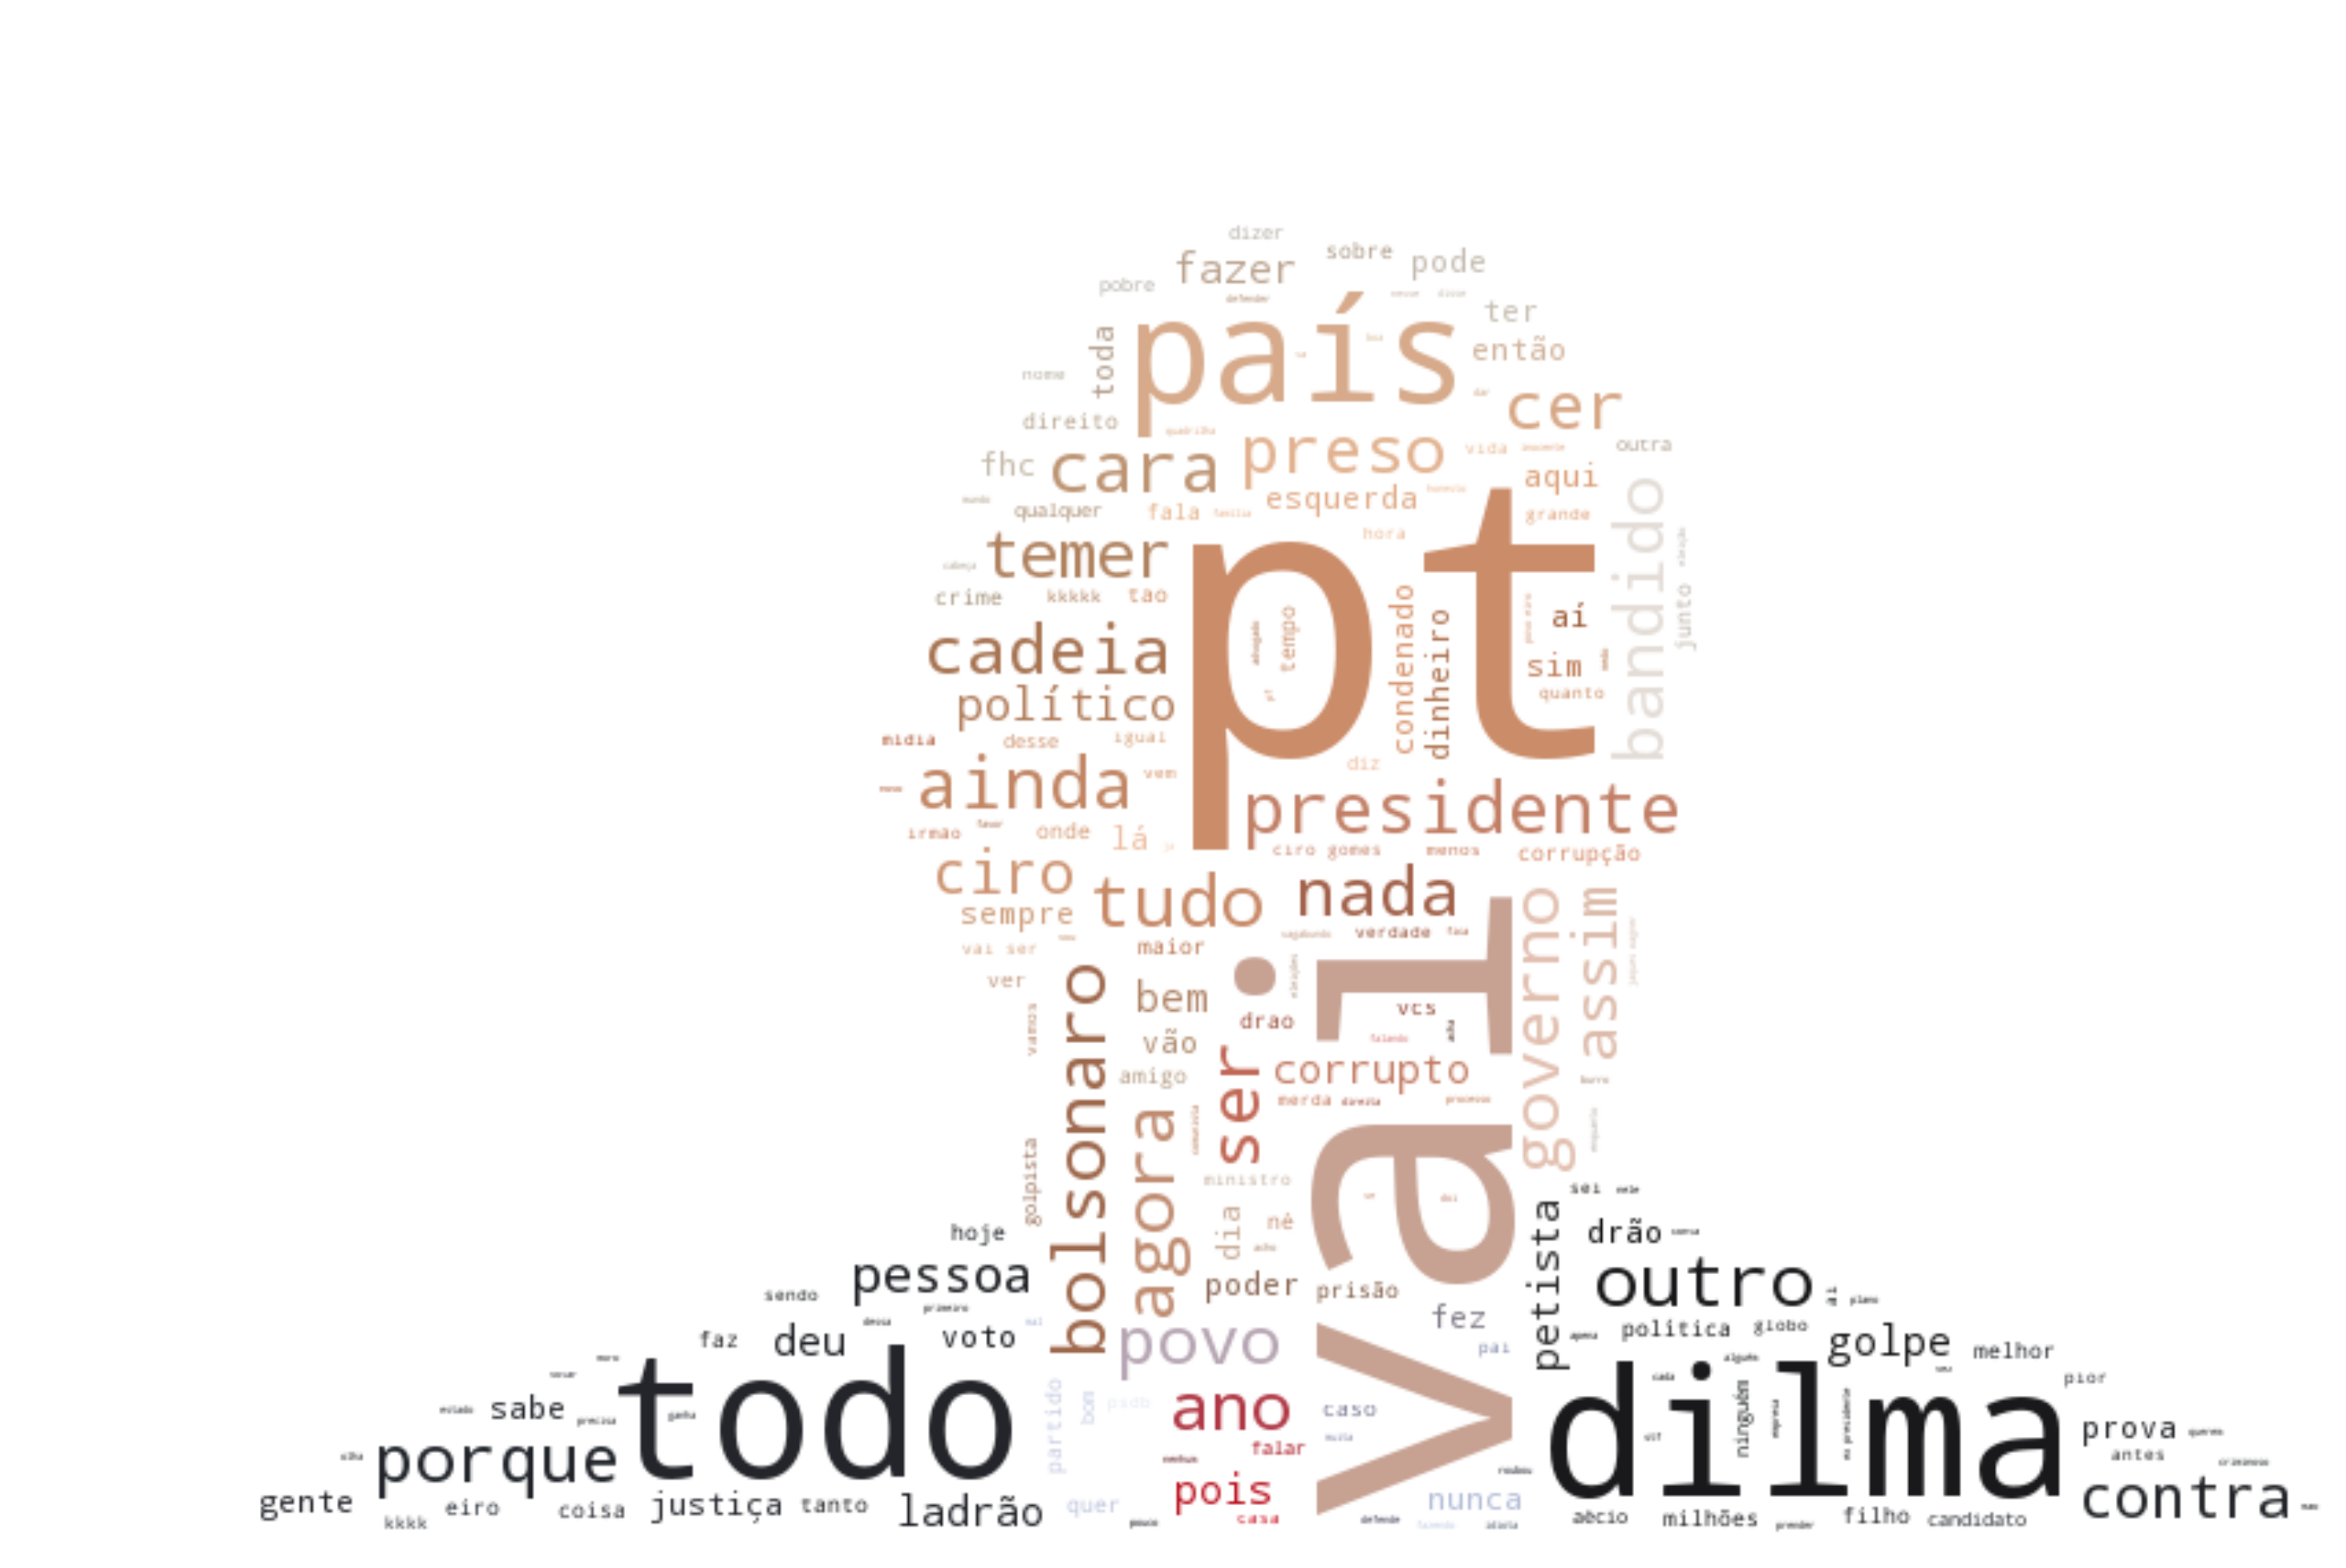

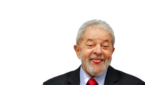

In [451]:
img = np.array(Image.open('./lula.jpg'))
palavras = set(face_candidatos.MENCOES_PROCESSADAS[face_candidatos.MENCOES_PROCESSADAS.str.contains('lula')].str.replace('(lula|brasil)', ''))
wc = WordCloud(background_color="white", 
                            max_words=500, mask=img ,
                            margin=10,random_state=1)
wc.generate(' '.join(palavras))
image_colors = ImageColorGenerator(img)
plt.figure(figsize=(50,50))
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.show()
plt.figure(figsize=(2,2))
plt.imshow(img, cmap=plt.cm.gray, interpolation="bilinear")
plt.axis("off")
plt.show()

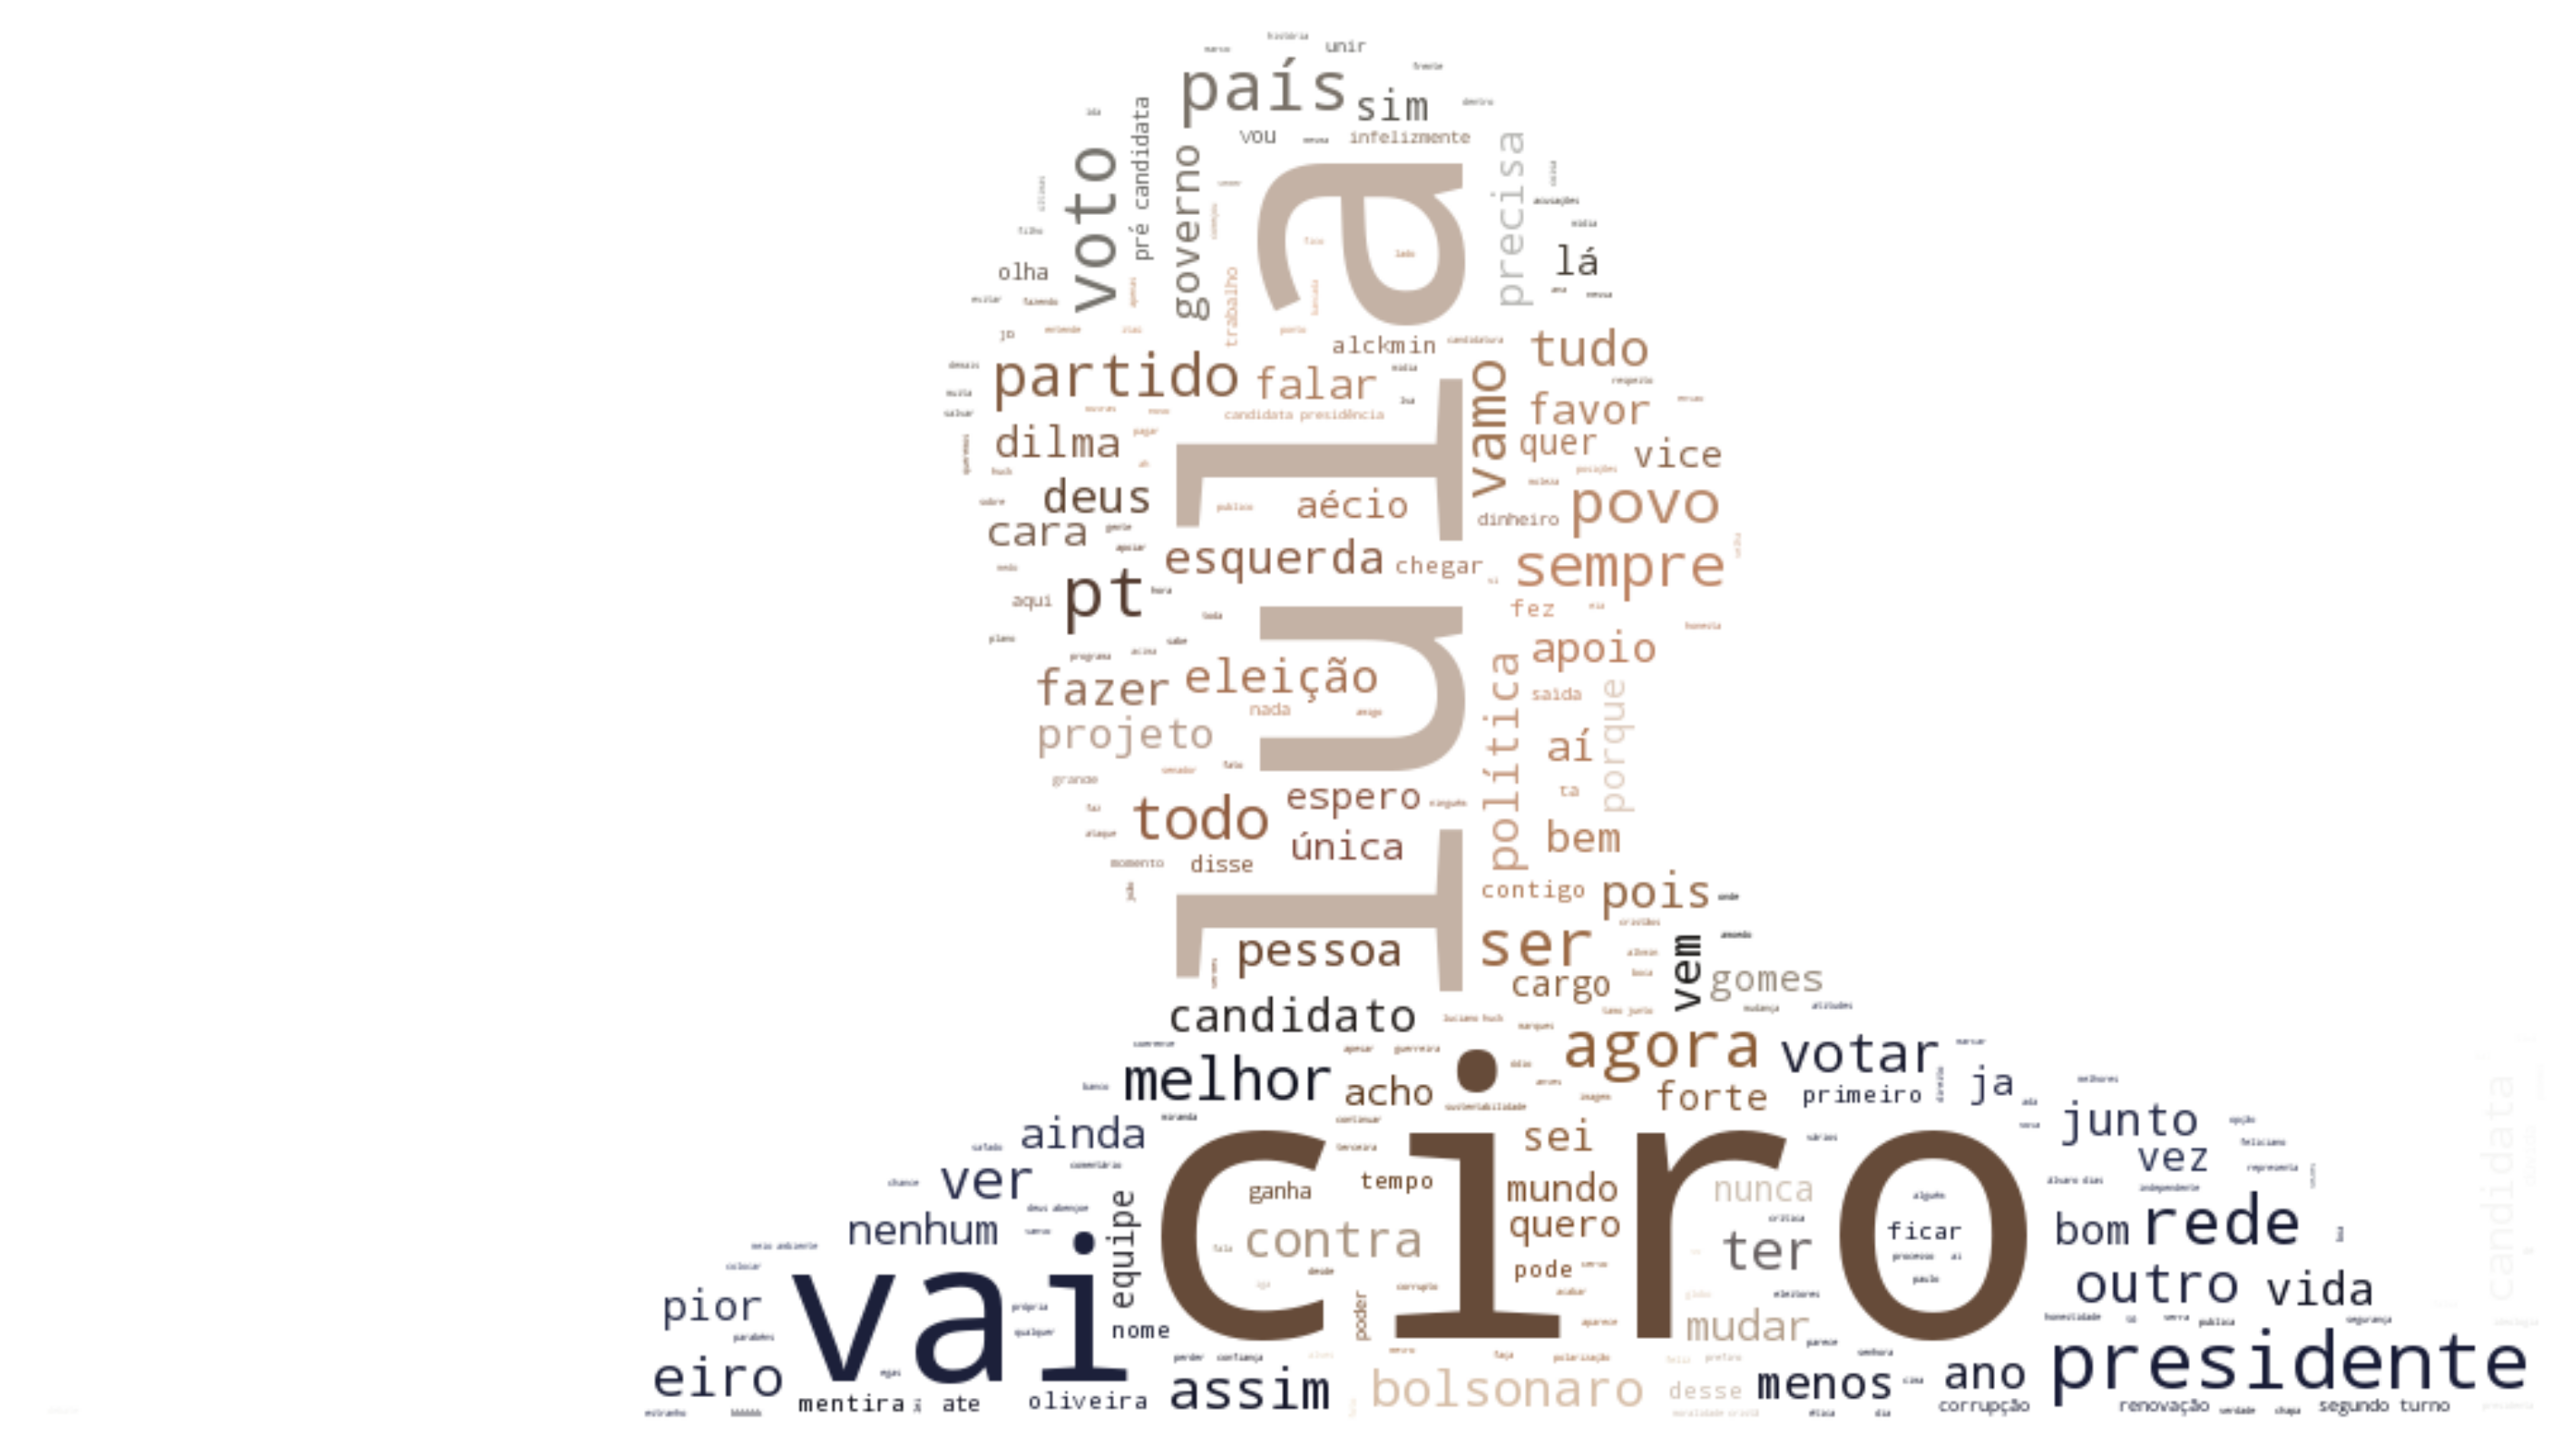

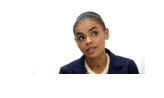

In [449]:
img = np.array(Image.open('./marina.jpg'))
palavras = set(face_candidatos.MENCOES_PROCESSADAS[face_candidatos.MENCOES_PROCESSADAS.str.contains('marina')].str.replace('(marina|silva|brasil)', ''))

wc = WordCloud(background_color="white", 
                            max_words=500, mask=img ,
                            margin=10,random_state=1)
wc.generate(' '.join(palavras))
image_colors = ImageColorGenerator(img)
plt.figure(figsize=(50,50))
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.show()
plt.figure(figsize=(2,2))
plt.imshow(img, cmap=plt.cm.gray, interpolation="bilinear")
plt.axis("off")
plt.show()

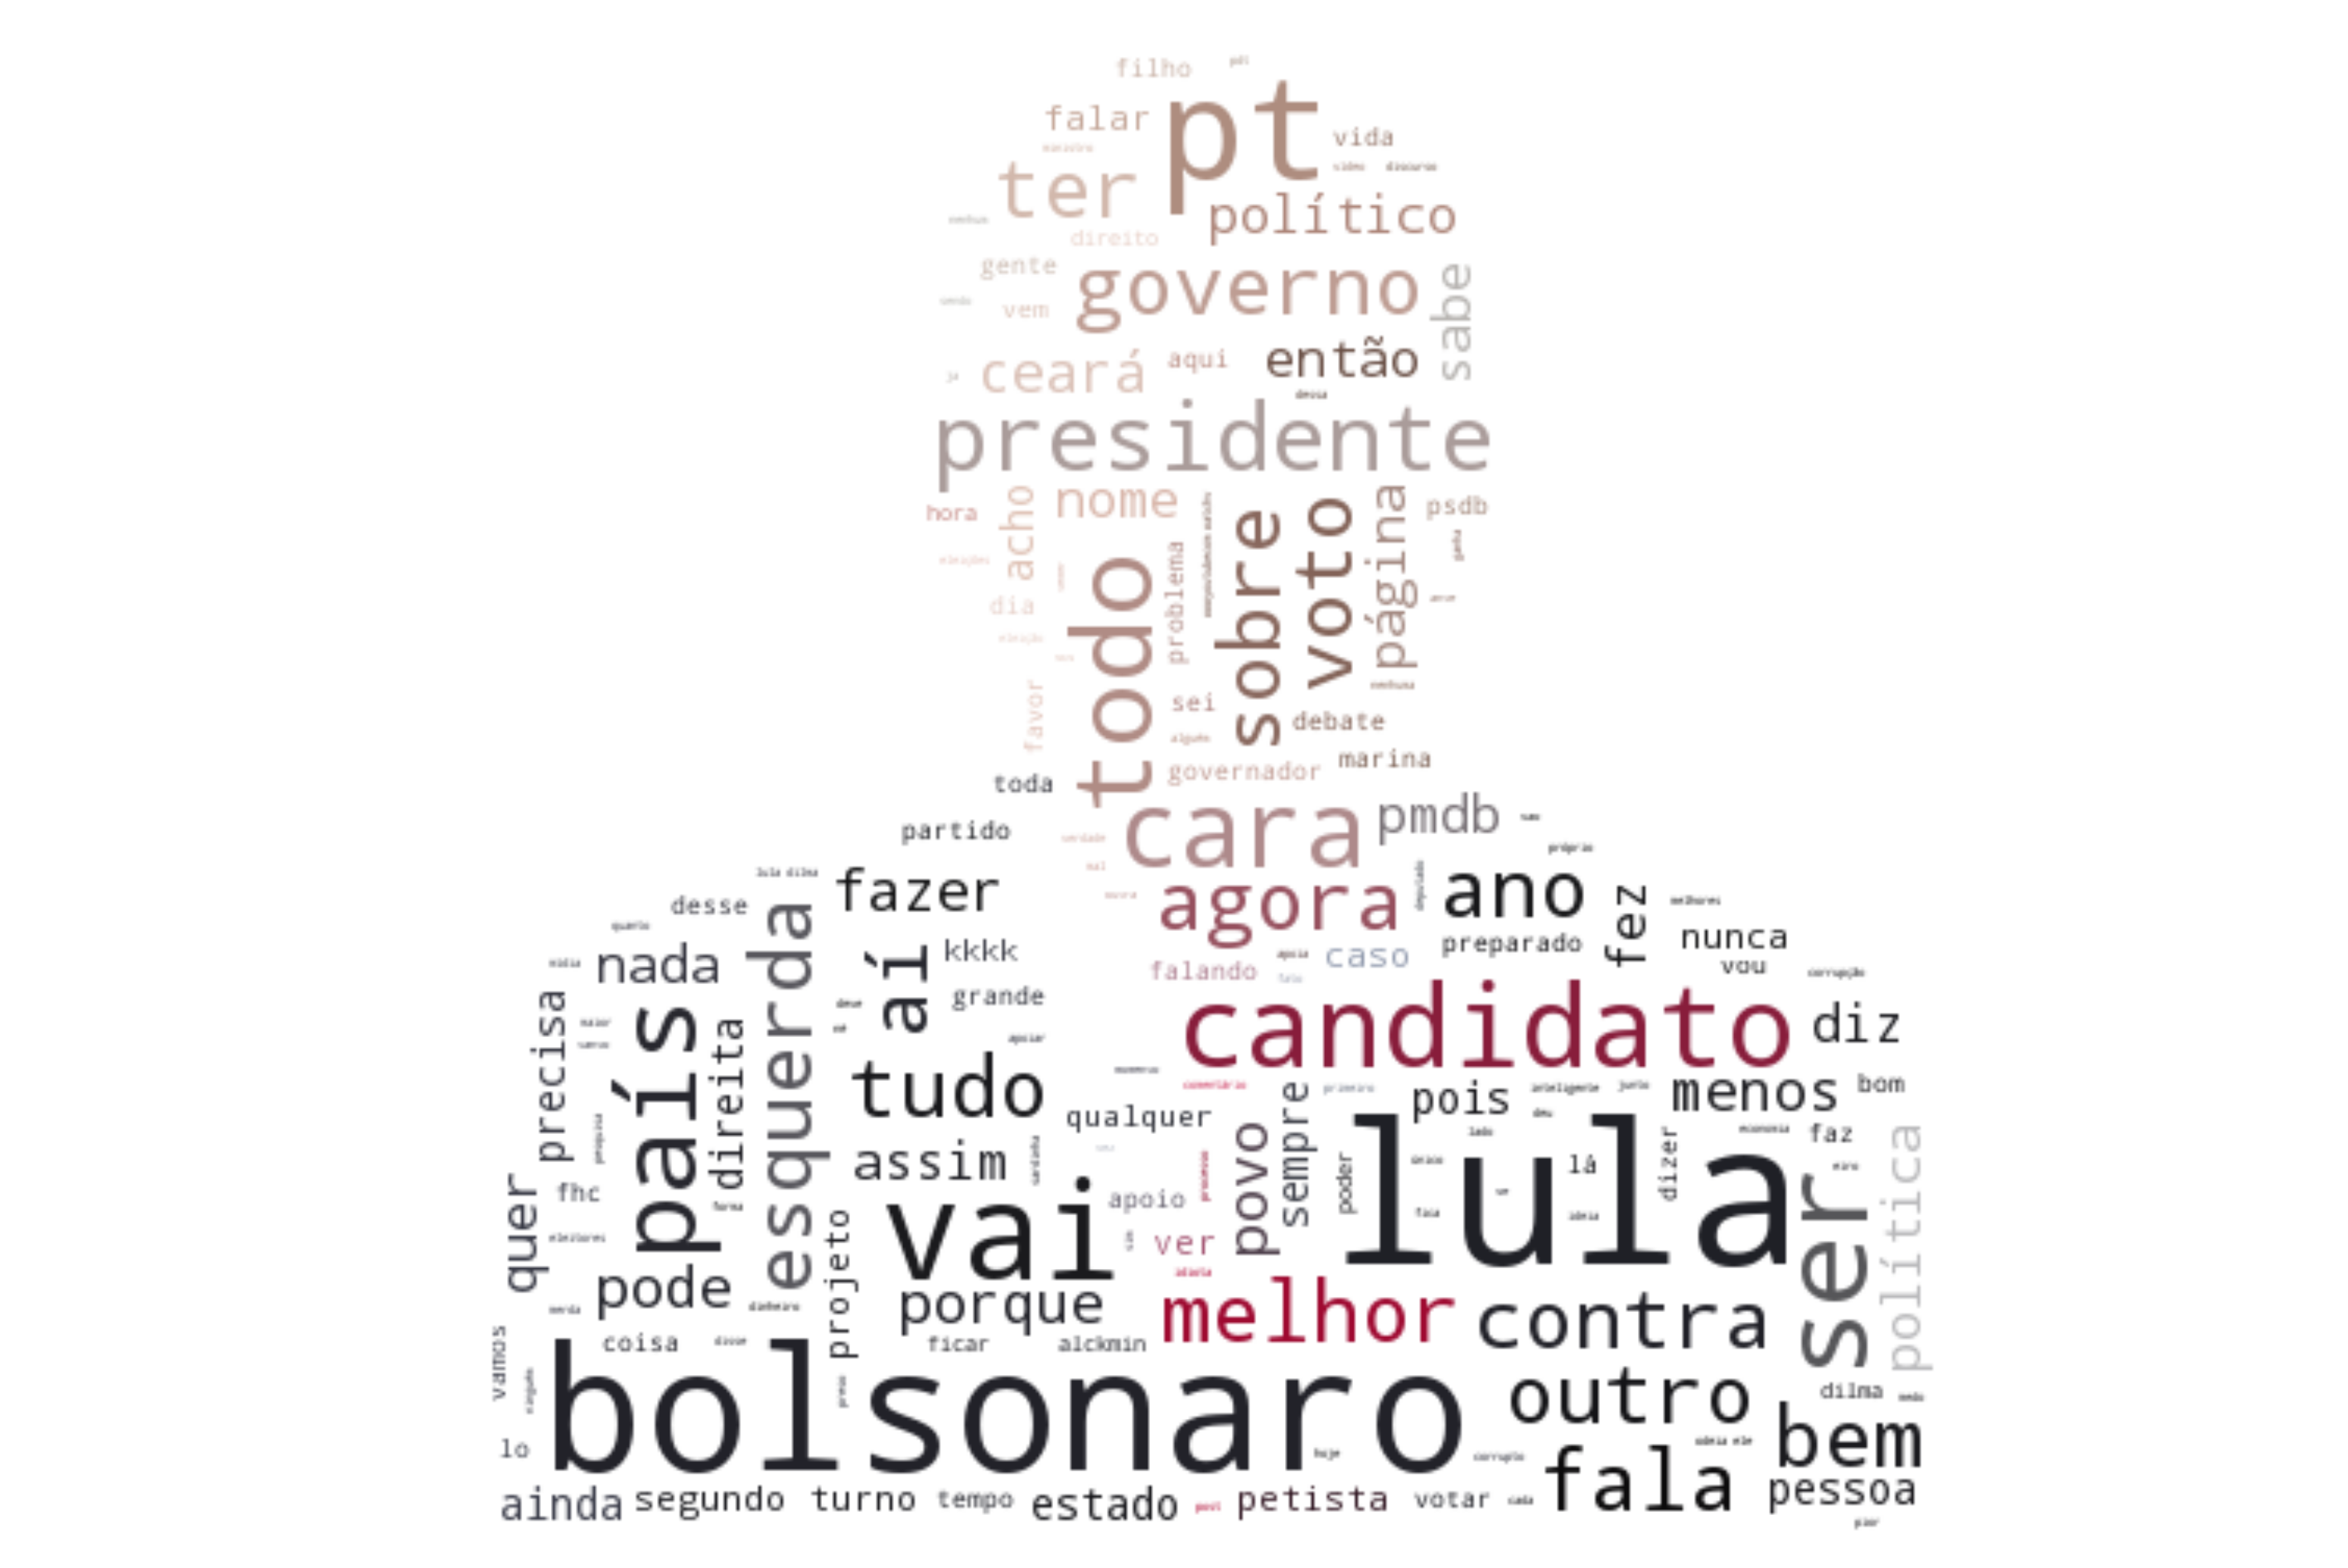

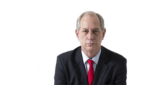

In [452]:
img = np.array(Image.open('./ciro.jpg'))
palavras = set(face_candidatos.MENCOES_PROCESSADAS[face_candidatos.MENCOES_PROCESSADAS.str.contains('(ciro)')].str.replace('(ciro|gomes|brasil)', ''))

wc = WordCloud(background_color="white", 
                            max_words=500, mask=img ,
                            margin=10,random_state=1)
wc.generate(' '.join(palavras))
image_colors = ImageColorGenerator(img)
plt.figure(figsize=(50,50))
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.show()
plt.figure(figsize=(2,2))
plt.imshow(img, cmap=plt.cm.gray, interpolation="bilinear")
plt.axis("off")
plt.show()